<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-custom-functions" data-toc-modified-id="Import-custom-functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import custom functions</a></span></li><li><span><a href="#Read-in-Files" data-toc-modified-id="Read-in-Files-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read in Files</a></span><ul class="toc-item"><li><span><a href="#Read-in-results-file" data-toc-modified-id="Read-in-results-file-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Read in results file</a></span></li><li><span><a href="#Bookie-Data" data-toc-modified-id="Bookie-Data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Bookie Data</a></span></li><li><span><a href="#Teamnames-Lookup" data-toc-modified-id="Teamnames-Lookup-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Teamnames Lookup</a></span></li><li><span><a href="#Transfermarkt" data-toc-modified-id="Transfermarkt-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Transfermarkt</a></span></li><li><span><a href="#XG-Predictions-file" data-toc-modified-id="XG-Predictions-file-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>XG Predictions file</a></span></li><li><span><a href="#Create-Season-Order" data-toc-modified-id="Create-Season-Order-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Create Season Order</a></span></li><li><span><a href="#Create-single-line-df" data-toc-modified-id="Create-single-line-df-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Create single line df</a></span></li><li><span><a href="#Create-target-goals-dataframe" data-toc-modified-id="Create-target-goals-dataframe-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Create target goals dataframe</a></span></li><li><span><a href="#Split-out-seasons" data-toc-modified-id="Split-out-seasons-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Split out seasons</a></span></li><li><span><a href="#Kfold" data-toc-modified-id="Kfold-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Kfold</a></span></li><li><span><a href="#Scaling" data-toc-modified-id="Scaling-2.11"><span class="toc-item-num">2.11&nbsp;&nbsp;</span>Scaling</a></span></li></ul></li><li><span><a href="#Train-Model" data-toc-modified-id="Train-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Train Model</a></span><ul class="toc-item"><li><span><a href="#Create-Team-Strength" data-toc-modified-id="Create-Team-Strength-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Create Team Strength</a></span></li><li><span><a href="#Scale-Strengths-and-create-score-prediction-dataframe" data-toc-modified-id="Scale-Strengths-and-create-score-prediction-dataframe-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Scale Strengths and create score prediction dataframe</a></span></li><li><span><a href="#Score-Model" data-toc-modified-id="Score-Model-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Score Model</a></span></li><li><span><a href="#Poisson-Score-Probabilities" data-toc-modified-id="Poisson-Score-Probabilities-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Poisson Score Probabilities</a></span></li></ul></li><li><span><a href="#Test-on-2018" data-toc-modified-id="Test-on-2018-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Test on 2018</a></span><ul class="toc-item"><li><span><a href="#Look-at-log-loss" data-toc-modified-id="Look-at-log-loss-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Look at log loss</a></span></li></ul></li><li><span><a href="#Gambling-Analysis" data-toc-modified-id="Gambling-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Gambling Analysis</a></span><ul class="toc-item"><li><span><a href="#Examining-the-Dataframe" data-toc-modified-id="Examining-the-Dataframe-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Examining the Dataframe</a></span></li><li><span><a href="#Raw-Profit" data-toc-modified-id="Raw-Profit-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Raw Profit</a></span></li><li><span><a href="#Most-Profitable-Games-2018" data-toc-modified-id="Most-Profitable-Games-2018-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Most Profitable Games 2018</a></span></li><li><span><a href="#Weekly-Profit-2018" data-toc-modified-id="Weekly-Profit-2018-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Weekly Profit 2018</a></span></li><li><span><a href="#Understanding-the-best-Value-Cutoff" data-toc-modified-id="Understanding-the-best-Value-Cutoff-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Understanding the best Value Cutoff</a></span></li><li><span><a href="#Impact-of-Index-across-seasons" data-toc-modified-id="Impact-of-Index-across-seasons-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Impact of Index across seasons</a></span></li><li><span><a href="#Weekly-Profit-for-Best-Index-2018" data-toc-modified-id="Weekly-Profit-for-Best-Index-2018-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Weekly Profit for Best Index 2018</a></span></li></ul></li><li><span><a href="#Kelly-Criterion" data-toc-modified-id="Kelly-Criterion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Kelly Criterion</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import log_loss


from sklearn.preprocessing import LabelEncoder,StandardScaler, MinMaxScaler
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score, cross_val_predict
from sklearn import ensemble, metrics, model_selection as ms, preprocessing, tree
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import linear_model as lm
from sklearn import svm
from sklearn import neighbors
from sklearn import tree, discriminant_analysis, naive_bayes, ensemble, gaussian_process

import statsmodels.api as sm
import statsmodels.formula.api as smf
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 70)
import datetime


from pathlib import Path
import os
from os import listdir
from os.path import isfile, join

from sklearn.feature_selection import RFECV

import random


# Import custom functions

In [2]:
from _00_BettingFunctions import (create_model_probs_df,returns,expected_returns,result_returns,
                              determine_bet,most_likely_result,prediction_correct,bet_index_cutoff,bet_profit,
                              full_gambling_calc,full_gambling_calc_cutoff)

In [3]:
from _00_DataPrepFunctions import (lookupclean, ema_no_reset, moving_average_no_reset, restructure_ema, create_model_base_scaled,
                                   create_model_base)

In [4]:
from _00_OptimiseAlphaFunctions import (optimise_alpha_classifier,optimise_alpha,track_best_span)

In [5]:
from _00_TeamStrengthFunctions import fitStrModel,fitScoreModel,simulate_match

# Read in Files

## Read in results file
This contains the statistics from all the matches we will use to build our model

In [6]:
results = pd.read_csv(r"C:\\Users\Byron\Documents\Football Predictions\PremierLeaguePredictions\data\ff_us_1419.csv").drop("Unnamed: 0",axis=1)
results.tail(1)

,season,gameweek,matchid,fixture,matchdate,f_Team,f_HmGame,f_Possession,f_Touches - Final Third,f_Touches - Penalty Area,f_Passes - Final Third - Successful,f_Chances Created,f_Goals,f_Goals From Penalties,f_Goal Attempts,f_Shots - Inside Box,f_Big Chances Total,f_Shots On Target,f_Goal Attempts In Box Conceded,f_Shots Conceded,f_Shots On Target Conceded,f_Big Chances Conceded,f_xG Open Play,f_xG Expected Goals,f_xA Expected Assists,f_Goals Conceded,f_xG Conceded,f_Touches - Final Third Conceded,f_Touches - Penalty Area Conceded,f_Passes - Final Third - Successful Conceded,f_xG Open Play Conceded,f_US xG,f_US xG Conceded,f_Points,f_Chances Conceded,gw_no,f_Touches - Final Third log,f_xA Expected Assists Conceded
4355,2019,Gameweek 28,/matches/1059979/,Tottenham Hotspur vs Wolverhampton Wanderers,2020-03-01 14:00:00,Wolverhampton Wanderers,0,34.1,128,25,42,10,3,0,14,11,4,4,10,13,5,3,2.18,2.56,0.48,2,1.7,189,23,82,1.61,2.62405,1.63078,3,9,28,4.85203,0.42


## Bookie Data

In [7]:
odds = pd.read_csv(r"C:\\Users\Byron\Documents\Football Predictions\PremierLeaguePredictions\data\bookie_odds.csv").drop("Unnamed: 0",axis=1)
odds_clean = odds[["season","fixture","FTR","bookie","BookieHomeOdds","BookieDrawOdds"
                  ,"BookieAwayOdds","BookieHomeProb","BookieDrawProb","BookieAwayProb"]].copy()
odds_clean.tail(1)

,season,fixture,FTR,bookie,BookieHomeOdds,BookieDrawOdds,BookieAwayOdds,BookieHomeProb,BookieDrawProb,BookieAwayProb
2187,2019,Sheffield United vs Arsenal,H,Bet365,3.9,3.75,1.9,0.25641,0.266667,0.526316


In [8]:
merge_vars = ["season","matchid","gw_no","fixture","matchdate"]
team_vars = ["HomeTeam","AwayTeam"]
pred_cols = ["Model_Prob_"+col for col in ["A","D","H"]]
gamble_cols = merge_vars + team_vars + pred_cols
print(gamble_cols)

['season', 'matchid', 'gw_no', 'fixture', 'matchdate', 'HomeTeam', 'AwayTeam', 'Model_Prob_A', 'Model_Prob_D', 'Model_Prob_H']


## Teamnames Lookup

In [9]:
TeamNames = pd.read_csv(r"C:\\Users\Byron\Documents\Football Predictions\PremierLeaguePredictions\data\PremTeamNamesLookup.csv")
TeamNames.tail(1)

,league,FootballData,Understat,FFScout,Transfermarkt
29,EPL,Wolves,Wolverhampton Wanderers,Wolverhampton Wanderers,Wolverhampton Wanderers


## Transfermarkt

In [10]:
transfermarkt = pd.read_csv(r"C:\\Users\Byron\Documents\Football Predictions\PremierLeaguePredictions\data\TransferMarkt.csv")
AMVMean =(transfermarkt.groupby("Season")[["AverageMarketValue"]].mean().reset_index().rename(columns={"AverageMarketValue":"AVMMean"}))
transfermarkt = pd.merge(transfermarkt,AMVMean)
transfermarkt["AMVIndex"]=transfermarkt["AverageMarketValue"]/transfermarkt["AVMMean"]

transfermarkt.tail(2)


,Season,Club,Squad,Age,Foreigners,TotalMarket,AverageMarketValue,AVMMean,AMVIndex
118,2014,Leicester City,37,25.9,18,50.27,1.36,4.8385,0.281079
119,2014,Burnley FC,30,25.5,13,33.08,1.10,4.8385,0.227343


In [11]:
transfermarkt_clean = lookupclean(TeamNames,transfermarkt,"Club","FFScout","Transfermarkt")
tm = pd.merge(transfermarkt_clean,AMVMean)
tm.tail(2)

,FFScout,Season,Squad,Age,Foreigners,TotalMarket,AverageMarketValue,AVMMean,AMVIndex
118,West Bromwich Albion,2014,34,25.5,22,90.54,2.66,4.8385,0.549757
119,West Ham United,2014,36,24.8,21,110.70,3.08,4.8385,0.636561


## XG Predictions file

In [12]:
xg_pred_cols = ["AttStr_Home","DefStr_Home","AttStr_Away","DefStr_Away","Pred_HG","Pred_AG"]

In [13]:
xg_pred = pd.read_csv(r"C:\\Users\Byron\Documents\Football Predictions\UnderstatPredictions\Datasets\xg_predictions.csv")
xg_pred = xg_pred[(xg_pred["league"]=="EPL") &
                 (xg_pred["AverageMethod"]=="EMA No reset")]

xg_pred["season"] = xg_pred["season"].apply(lambda x: x[:4])

xg_pred_clean = xg_pred[["season","fixture","season_gw","Team_Home","Team_Away","AttStr_Home",
                  "DefStr_Home","AttStr_Away","DefStr_Away","Pred_HG","Pred_AG"]].dropna()

xg_pred_clean = lookupclean(TeamNames,xg_pred_clean,"Team_Home","FFScout","Understat").rename(columns={"FFScout":"HomeTeam"})
xg_pred_clean = lookupclean(TeamNames,xg_pred_clean,"Team_Away","FFScout","Understat").rename(columns={"FFScout":"AwayTeam"})
xg_pred_clean["fixture"] = xg_pred_clean["HomeTeam"]+ " vs " + xg_pred_clean["AwayTeam"]
xg_pred_clean["season"] = xg_pred_clean["season"].apply(lambda x: int(x))
xg_pred_clean = xg_pred_clean.drop(columns=["HomeTeam","AwayTeam"])

xg_pred_clean.sort_values(by=["season","season_gw"])

,season,fixture,season_gw,AttStr_Home,DefStr_Home,AttStr_Away,DefStr_Away,Pred_HG,Pred_AG
37,2014,Leicester City vs Arsenal,3,0.819551,1.215063,1.352023,0.690942,0.707827,1.971351
450,2014,Everton vs Chelsea,3,0.891405,1.230540,1.883101,0.419984,0.467970,2.780677
594,2014,Newcastle United vs Crystal Palace,3,0.750911,0.888431,0.357083,1.308263,1.227987,0.380693
805,2014,Aston Villa vs Hull City,3,0.637036,0.512088,0.897422,1.586437,1.263272,0.551470
1037,2014,Tottenham Hotspur vs Liverpool,3,1.560331,1.317310,1.006601,1.295523,2.526805,1.591206
...,...,...,...,...,...,...,...,...,...
1407,2019,Manchester City vs Norwich City,38,1.725867,0.577955,0.720922,1.228322,2.284803,0.376152
1456,2019,Southampton vs Sheffield United,38,0.992274,0.963071,0.923272,0.888197,0.949882,0.802729
1810,2019,Crystal Palace vs Tottenham Hotspur,38,0.717594,1.014103,0.990250,0.992783,0.767825,0.906584
1892,2019,Arsenal vs Watford,38,1.021431,1.020375,0.866156,1.114085,1.226469,0.797879


In [14]:
xg_pred.head(2)

,league,season,fixture,season_gw,Team_Home,Team_Away,homegoals,awaygoals,Result,AverageMethod,xG_av_Home,xGA_av_Home,AttStr_Home,DefStr_Home,xG_av_Away,xGA_av_Away,AttStr_Away,DefStr_Away,SeasonHG,SeasonAG,Pred_HG,Pred_AG,Prob_HG,Prob_AG,score,HomeProb,DrawProb,AwayProb,PredScore,PredScoreProb,PredResult,PredResultProb,PredResultScore,PredResultScoreProb,FinalResultProb,FinalScore,PredCorrect,PredResultScoreCorrect,PredScoreCorrect
7344,EPL,2014,Manchester United vs Swansea,1,Manchester United,Swansea,1.0,2.0,A,EMA No reset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.173203,1.013072,NaN,NaN,[nan nan nan nan nan nan nan nan nan nan],[nan nan nan nan nan nan nan nan nan nan],0 1 2 3 4 5 6 7 8 9\n0 N...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 . 2,0,0,0
7348,EPL,2014,Leicester vs Everton,1,Leicester,Everton,2.0,2.0,D,EMA No reset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.173203,1.013072,NaN,NaN,[nan nan nan nan nan nan nan nan nan nan],[nan nan nan nan nan nan nan nan nan nan],0 1 2 3 4 5 6 7 8 9\n0 N...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 . 2,0,0,0


## Create Season Order

In [15]:
season_list = [2014,2015,2016,2017,2018,2019]
season_gws = range(1,39)
final_order = pd.DataFrame()
x= 1
for i in season_list:
    for j in season_gws:
        gw_order=pd.DataFrame(data={"season":i,"gw_no":j,"gw_sq":x},index=[0])
        final_order = final_order.append(gw_order)
        x = x+1
        
results = pd.merge(results,final_order, on = ["season","gw_no"]).copy()
results.tail(2)

,season,gameweek,matchid,fixture,matchdate,f_Team,f_HmGame,f_Possession,f_Touches - Final Third,f_Touches - Penalty Area,f_Passes - Final Third - Successful,f_Chances Created,f_Goals,f_Goals From Penalties,f_Goal Attempts,f_Shots - Inside Box,f_Big Chances Total,f_Shots On Target,f_Goal Attempts In Box Conceded,f_Shots Conceded,f_Shots On Target Conceded,f_Big Chances Conceded,f_xG Open Play,f_xG Expected Goals,f_xA Expected Assists,f_Goals Conceded,f_xG Conceded,f_Touches - Final Third Conceded,f_Touches - Penalty Area Conceded,f_Passes - Final Third - Successful Conceded,f_xG Open Play Conceded,f_US xG,f_US xG Conceded,f_Points,f_Chances Conceded,gw_no,f_Touches - Final Third log,f_xA Expected Assists Conceded,gw_sq
4354,2019,Gameweek 28,/matches/1059979/,Tottenham Hotspur vs Wolverhampton Wanderers,2020-03-01 14:00:00,Tottenham Hotspur,1,65.9,189,23,82,9,2,0,13,10,3,5,11,14,4,4,1.61,1.70,0.42,3,2.56,128,25,42,2.18,1.63078,2.62405,0,10,28,5.241747,0.48,218
4355,2019,Gameweek 28,/matches/1059979/,Tottenham Hotspur vs Wolverhampton Wanderers,2020-03-01 14:00:00,Wolverhampton Wanderers,0,34.1,128,25,42,10,3,0,14,11,4,4,10,13,5,3,2.18,2.56,0.48,2,1.70,189,23,82,1.61,2.62405,1.63078,3,9,28,4.852030,0.42,218


## Create single line df
We will use our results dataset to create a single line results dataset that contains the Result. This will be our target variable.

In [16]:
def home_teams(df,keep):
    outdf = df.copy()
    outdf = outdf.query("f_HmGame==1")
    outdf = outdf[keep]
    outdf=outdf.rename(columns={'f_Team': 'HomeTeam'})
    return outdf

def away_teams(df,keep):
    outdf = df.copy()
    outdf = outdf.query("f_HmGame==0")
    outdf = outdf[keep]
    outdf=outdf.rename(columns={'f_Team': 'AwayTeam'})
    return outdf

def fixture_scores(df,score_keep_vars):
    outdf = df.copy()
    outdf = outdf.query("f_HmGame==1")
    outdf = outdf[score_keep_vars]
    outdf=outdf.rename(columns={'f_Goals': 'HomeGoals',
                                'f_Goals Conceded': 'AwayGoals'})
    return outdf

def join_fixtures(home,away,scores,merge_vars):
    outdf= pd.merge(home,away,on=merge_vars)
    outdf = pd.merge(outdf,scores,on=merge_vars)
    return outdf
def final_outcome(fixtures,homegoals,awaygoals):
    outdf = fixtures.copy()
    outdf["Result"] = np.where(outdf[homegoals]>outdf[awaygoals],"H",
                              np.where(outdf[homegoals]<outdf[awaygoals],"A","D"))
    return outdf

In [17]:
keep_vars = ["season","matchid","gw_no","fixture","matchdate","f_Team"]
score_keep_vars = ["season","matchid","gw_no","fixture","matchdate","f_Goals","f_Goals Conceded"]
merge_vars = ["season","matchid","gw_no","fixture","matchdate"]
team_vars = ["HomeTeam","AwayTeam"]

In [18]:
hometeams = home_teams(results,keep_vars)
awayteams = away_teams(results,keep_vars)
scores = fixture_scores(results,score_keep_vars)
single_line = join_fixtures(hometeams,awayteams,scores,merge_vars)
single_line = final_outcome(single_line,"HomeGoals","AwayGoals")
single_line.tail(2)

,season,matchid,gw_no,fixture,matchdate,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result
2176,2019,/matches/1059975/,28,Everton vs Manchester United,2020-03-01 14:00:00,Everton,Manchester United,1,1,D
2177,2019,/matches/1059979/,28,Tottenham Hotspur vs Wolverhampton Wanderers,2020-03-01 14:00:00,Tottenham Hotspur,Wolverhampton Wanderers,2,3,A


## Create target goals dataframe
This contains target variables for a per team modelling dataset predicting goals scored or conceded

In [19]:
target_goals = results[['f_Team', 'matchid','f_HmGame','f_Goals', 'f_Goals Conceded',"f_US xG", "f_US xG Conceded"]].copy() 
target_goals.columns = ['f_Team', 'matchid','f_HmGameFut','t_Goals', 't_Goals Conceded',"t_US xG", "t_US xG Conceded"]
target_goals.loc[0:,"t_Goals_Scored_In"] = np.where(target_goals["t_Goals"]>0,1,0)
target_goals.loc[0:,"t_Goals_Conceded_In"] = np.where(target_goals["t_Goals Conceded"]>0,1,0)
target_goals.head(2)

,f_Team,matchid,f_HmGameFut,t_Goals,t_Goals Conceded,t_US xG,t_US xG Conceded,t_Goals_Scored_In,t_Goals_Conceded_In
0,Swansea City,/matches/755307/,0,2,1,0.278076,1.166350,1,1
1,Manchester United,/matches/755307/,1,1,2,1.166350,0.278076,1,1


## Split out seasons

In [20]:
training = results[results["season"].isin([2014,2015,2016,2017])]
test = results[results["season"]==2018]
holdout = results[results["season"]==2019]

## Kfold

In [21]:
kfold = StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
cv = KFold(n_splits = 5, shuffle =True, random_state = 42)

## Scaling

In [22]:
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

# Train Model

In [23]:
features = [i for i in results.columns if i.startswith("f_") and i not in(["f_Team","f_xA Expected Assists Conceded"])]
calculated_features = ["f_netxg","f_xGRatio","f_ShotsRatio","f_ShOnTargetRatio"]

In [24]:
def id_opponent(fixture,home):
    if home==1:
        opponent = fixture.split(" vs ")[1]
    else:
        opponent = fixture.split(" vs ")[0]
    return opponent

def create_teamstr_df(df,span):
    ema_output = ema_no_reset(df, span=span,feature_cols=features)
    ema_target = pd.merge(ema_output, target_goals, on = ['f_Team','matchid']).dropna()
    ema_target = pd.merge(ema_target,tm[["FFScout","Season","AMVIndex"]],left_on=["f_Team","season"],
             right_on=["FFScout","Season"]).rename(columns={"AMVIndex":"f_AMVIndex"}).drop(["FFScout","Season"],axis=1)
    ema_target = pd.merge(ema_target,final_order, on = ["season","gw_no"]).copy()
    ema_target["opponent"] = ema_target.apply(lambda row: id_opponent(row["fixture"],row["f_HmGameFut"]),axis=1)
    return ema_target

def create_pred_goals_df(df, team_vars):
    team_df = df[["matchid","fixture","f_Team","season","gw_no","gw_sq","f_HmGameFut","t_Goals","t_Goals Conceded",
                  "opponent"]+team_vars].copy()
    opp_df = df[["f_Team","fixture","season"]+team_vars].copy()
    opp_df = opp_df.rename(columns = {col: "Opp" + col for col in team_vars})
    opp_df = opp_df.rename(columns = {"f_Team":"opponent"})
    
    vs_df = pd.merge(team_df,opp_df, on =["opponent","season","fixture"])
    return vs_df

def create_single_line_df(df):
    HomeTeam = df[df["f_HmGameFut"]==1][["matchid","fixture","f_Team","season","gw_no","f_HmGameFut","AttStr","DefStr",
                                               "t_Goals","t_Goals Conceded","opponent","gw_sq","OppAttStr"
                                               ,"OppDefStr","PredGoals"]].rename(columns = {"PredGoals":"PredHomeGoals"})
    AwayTeam = df[df["f_HmGameFut"]==0][["season","gw_no","fixture","PredGoals"]].rename(columns={"PredGoals":"PredAwayGoals"})
    SingleLinePred = pd.merge(HomeTeam,AwayTeam,on=["season","gw_no","fixture"])
    return SingleLinePred

## Create Team Strength

In [25]:
#Create attacking and Defensive strength metrics based on sample of 2014-2017 seasons
random.seed(42)
ema_target = create_teamstr_df(training,36)
#train, test = season_split(ema_target,0.2,"gw_sq")

#Define model variables
att_manual = ["f_US xG","f_AMVIndex","f_Touches - Penalty Area","f_Points"]
def_manual = ["f_US xG Conceded","f_AMVIndex","f_Touches - Penalty Area Conceded","f_xGRatio"]

#Define model variables for xG
# att_manual_xG = ["f_US xG","f_AMVIndex","f_Touches - Penalty Area","f_Big Chances Total"]
# def_manual_xG = ['f_Shots On Target Conceded', 'f_AMVIndex', 'f_ShOnTargetRatio', 'f_Goals Conceded']

#fit models
gsAttStr = fitStrModel(ema_target,lm.Ridge(max_iter =1000),"t_Goals",att_manual,ema_target,cv)
gsDefStr = fitStrModel(ema_target,lm.Ridge(max_iter =1000),"t_Goals Conceded",def_manual,ema_target,cv)

# gsAttStrxG = fitStrModel(ema_target,lm.Ridge(max_iter =1000),"t_US xG",att_manual_xG,ema_target,cv)
# gsDefStrxG = fitStrModel(ema_target,lm.Ridge(max_iter =1000),"t_US xG Conceded",def_manual_xG,ema_target,cv)

# ema_target_v2 = ema_target.copy()

#Create new variables on to whole of 2014-2017 data
ema_target["AttStr"] = gsAttStr.predict(ema_target[att_manual])
ema_target["DefStr"] = gsDefStr.predict(ema_target[def_manual])
ema_target["Model"] = "Team Strength"

# ema_target_v2["AttStr"] = gsAttStrxG.predict(ema_target_v2[att_manual_xG])
# ema_target_v2["DefStr"] = gsDefStrxG.predict(ema_target_v2[def_manual_xG])
# ema_target_v2["Model"] = "Team Strength xG"

# ema_target = pd.concat([ema_target,ema_target_v2])

Target var is t_Goals and the best train score is -1.4051669942334126
The best score on the test dataset is 1.3985658104422447
Target var is t_Goals Conceded and the best train score is -1.4977292401097664
The best score on the test dataset is 1.493671339373156


In [26]:
ema_target.head(2)

,matchid,f_Team,gameweek,season,f_HmGame,fixture,matchdate,gw_no,f_xG Conceded,f_Touches - Final Third Conceded,f_Chances Created,f_US xG Conceded,f_Shots On Target,f_Goals From Penalties,f_Shots - Inside Box,f_xG Expected Goals,f_xA Expected Assists,f_Touches - Penalty Area,f_Possession,f_Touches - Penalty Area Conceded,f_Big Chances Total,f_Goals,f_Passes - Final Third - Successful Conceded,f_Passes - Final Third - Successful,f_Goal Attempts,...,f_Shots Conceded,f_Goal Attempts In Box Conceded,f_Goals Conceded,f_Touches - Final Third,f_Points,f_Touches - Final Third log,f_Shots On Target Conceded,f_Big Chances Conceded,f_netxg,f_xGRatio,f_ShotsRatio,f_ShOnTargetRatio,f_HmGameFut,t_Goals,t_Goals Conceded,t_US xG,t_US xG Conceded,t_Goals_Scored_In,t_Goals_Conceded_In,f_AMVIndex,gw_sq,opponent,AttStr,DefStr,Model
0,/matches/755324/,Manchester United,Gameweek 3,2014,0.486111,Burnley vs Manchester United,2014-08-30 12:45:00,3,0.0,98.777778,7.916667,0.477677,3.972222,0.0,5.430556,0.0,0.0,16.916667,57.744444,9.597222,1.513889,1.000000,35.708333,113.097222,11.944444,...,8.083333,3.569444,1.486111,215.972222,0.513889,5.375139,3.486111,0.000000,0.573154,0.687488,0.596394,0.332558,0,0,0,0.467281,0.513746,0,0,2.258965,3,Burnley,1.430597,0.847347,Team Strength
1,/matches/755324/,Burnley,Gameweek 3,2014,0.486111,Burnley vs Manchester United,2014-08-30 12:45:00,3,0.0,146.638889,7.000000,1.505202,1.486111,0.0,6.027778,0.0,0.0,14.652778,41.537500,15.805556,0.513889,0.486111,84.263889,54.277778,10.541667,...,10.486111,6.486111,1.972222,151.472222,0.000000,5.014043,3.513889,1.972222,-0.891408,0.289663,0.501321,0.140975,1,0,0,0.513746,0.467281,0,0,0.227343,3,Manchester United,0.829850,1.666426,Team Strength


## Scale Strengths and create score prediction dataframe

In [27]:
#Scale vars
ScaledStrength = standard_scaler.fit_transform(ema_target[["AttStr","DefStr"]])
ema_target[["AttStrScaled","DefStrScaled"]] = pd.DataFrame(ScaledStrength)
#invert defensive strength so that a lower prediction is considered a positive thing
ema_target["DefStrScaled"] = ema_target["DefStrScaled"]*-1

#Apply Scaling for xG Strength
# ScaledStrengthxG = standard_scaler.fit_transform(ema_target[["AttStrxG","DefStrxG"]])
# ema_target[["AttStrScaledxG","DefStrScaledxG"]] = pd.DataFrame(ScaledStrengthxG)
# ema_target["DefStrScaledxG"] = ema_target["DefStrScaledxG"]*-1

team_vars = ["AttStr","DefStr","AttStrScaled","DefStrScaled"] # "AttStrScaledxG","DefStrScaledxG"
#create a dataframe with strengths for each team and the opposition
vs_df = create_pred_goals_df(ema_target,team_vars)
#split into test train
vs_df.head()

,matchid,fixture,f_Team,season,gw_no,gw_sq,f_HmGameFut,t_Goals,t_Goals Conceded,opponent,AttStr,DefStr,AttStrScaled,DefStrScaled,OppAttStr,OppDefStr,OppAttStrScaled,OppDefStrScaled
0,/matches/755324/,Burnley vs Manchester United,Manchester United,2014,3,3,0,0,0,Burnley,1.430597,0.847347,0.226085,2.221121,0.829850,1.666426,-1.374034,-1.431785
1,/matches/755324/,Burnley vs Manchester United,Burnley,2014,3,3,1,0,0,Manchester United,0.829850,1.666426,-1.374034,-1.431785,1.430597,0.847347,0.226085,2.221121
2,/matches/755327/,Manchester City vs Stoke City,Stoke City,2014,3,3,0,1,0,Manchester City,1.283202,1.285421,-0.166510,0.267412,1.654933,0.966909,0.823613,1.687900
3,/matches/755327/,Manchester City vs Stoke City,Manchester City,2014,3,3,1,0,1,Stoke City,1.654933,0.966909,0.823613,1.687900,1.283202,1.285421,-0.166510,0.267412
4,/matches/755328/,Newcastle United vs Crystal Palace,Crystal Palace,2014,3,3,0,3,3,Newcastle United,0.747198,1.704515,-1.594181,-1.601654,1.142818,1.402398,-0.540429,-0.254279


## Score Model

In [28]:
#fit model on train, predict on entire base
score_vars_scaled = ["f_HmGameFut","AttStrScaled","OppDefStrScaled"]
GSScoreModel = fitScoreModel(vs_df,lm.LinearRegression(),"t_Goals",score_vars_scaled,vs_df,cv)

# score_vars_scaledxG = ["f_HmGameFut","AttStrScaledxG","OppDefStrScaledxG"]
# GSScoreModelxG = fitScoreModel(vs_df,lm.LinearRegression(),"t_Goals",score_vars_scaledxG,vs_df,cv)

# vs_df_xg = vs_df.copy()
#predict on main df
vs_df["PredGoals"] = GSScoreModel.predict(vs_df[score_vars_scaled])
vs_df["Model"] = "Team Strength"

# vs_df_xg["PredGoals"] = GSScoreModelxG.predict(vs_df_xg[score_vars_scaledxG])
# vs_df_xg["Model"] = "Team Strength xG"

# vs_df = pd.concat([vs_df,vs_df_xg])
vs_df.head()

Target var is t_Goals and the best score is -1.319485028125746
The best score on the test dataset is 1.3171673361278669


,matchid,fixture,f_Team,season,gw_no,gw_sq,f_HmGameFut,t_Goals,t_Goals Conceded,opponent,AttStr,DefStr,AttStrScaled,DefStrScaled,OppAttStr,OppDefStr,OppAttStrScaled,OppDefStrScaled,PredGoals,Model
0,/matches/755324/,Burnley vs Manchester United,Manchester United,2014,3,3,0,0,0,Burnley,1.430597,0.847347,0.226085,2.221121,0.829850,1.666426,-1.374034,-1.431785,1.553456,Team Strength
1,/matches/755324/,Burnley vs Manchester United,Burnley,2014,3,3,1,0,0,Manchester United,0.829850,1.666426,-1.374034,-1.431785,1.430597,0.847347,0.226085,2.221121,0.533292,Team Strength
2,/matches/755327/,Manchester City vs Stoke City,Stoke City,2014,3,3,0,1,0,Manchester City,1.283202,1.285421,-0.166510,0.267412,1.654933,0.966909,0.823613,1.687900,0.720645,Team Strength
3,/matches/755327/,Manchester City vs Stoke City,Manchester City,2014,3,3,1,0,1,Stoke City,1.654933,0.966909,0.823613,1.687900,1.283202,1.285421,-0.166510,0.267412,1.790242,Team Strength
4,/matches/755328/,Newcastle United vs Crystal Palace,Crystal Palace,2014,3,3,0,3,3,Newcastle United,0.747198,1.704515,-1.594181,-1.601654,1.142818,1.402398,-0.540429,-0.254279,0.609103,Team Strength


## Poisson Score Probabilities

In [29]:
fixture_pred_poiss = create_single_line_df(vs_df)

ProbVars = ["PoissHomeProb","PoissDrawProb","PoissAwayProb"]
fixture_pred_poiss[ProbVars] = fixture_pred_poiss.apply(lambda row: simulate_match(row["PredHomeGoals"],
                                                                                   row["PredAwayGoals"]),
                                                        axis = 1)
fixture_pred_poiss = final_outcome(fixture_pred_poiss,"t_Goals","t_Goals Conceded")
fixture_pred_poiss.tail()

,matchid,fixture,f_Team,season,gw_no,f_HmGameFut,AttStr,DefStr,t_Goals,t_Goals Conceded,opponent,gw_sq,OppAttStr,OppDefStr,PredHomeGoals,PredAwayGoals,PoissHomeProb,PoissDrawProb,PoissAwayProb,Result
1483,/matches/919239/,Manchester City vs Swansea City,Manchester City,2017,35,1,2.316421,0.797843,5,0,Swansea City,149,0.931697,1.589407,2.751729,0.202351,0.899272,0.085451,0.015136,H
1484,/matches/919197/,Liverpool vs Watford,Liverpool,2017,31,1,1.913607,1.008507,5,0,Watford,145,1.224172,1.489866,2.250013,0.702132,0.725599,0.173646,0.100731,H
1485,/matches/919199/,Stoke City vs Everton,Stoke City,2017,31,1,1.053333,1.540243,1,2,Everton,145,1.200372,1.465913,1.363206,1.198862,0.406151,0.265110,0.328739,A
1486,/matches/919193/,Bournemouth vs West Bromwich Albion,Bournemouth,2017,31,1,1.143186,1.632914,2,1,West Bromwich Albion,145,1.024119,1.496000,1.482839,1.112710,0.456869,0.258812,0.284319,H
1487,/matches/919195/,Huddersfield Town vs Crystal Palace,Huddersfield Town,2017,31,1,0.912374,1.549815,0,2,Crystal Palace,145,1.312047,1.479244,1.234794,1.320308,0.346658,0.266321,0.387020,A


# Test on 2018

In [30]:
ema_target = create_teamstr_df(results,36)

#Create new variables on to whole of 2014-2017 data
ema_target["AttStr"] = gsAttStr.predict(ema_target[att_manual])
ema_target["DefStr"] = gsDefStr.predict(ema_target[def_manual])

#Scale Attack and defense strength 
ScaledStrength = standard_scaler.transform(ema_target[["AttStr","DefStr"]])

ema_target[["AttStrScaled","DefStrScaled"]] = pd.DataFrame(ScaledStrength)
#invert defensive strength so that a lower prediction is considered a positive thing
ema_target["DefStrScaled"] = ema_target["DefStrScaled"]*-1

#create a dataframe with strengths for each team and the opposition
vs_df = create_pred_goals_df(ema_target,team_vars)
#predict on main df
vs_df["PredGoals"] = GSScoreModel.predict(vs_df[score_vars_scaled])

fixture_pred_poiss = create_single_line_df(vs_df)

ProbVars = ["PoissHomeProb","PoissDrawProb","PoissAwayProb"]
fixture_pred_poiss[ProbVars] = fixture_pred_poiss.apply(lambda row: simulate_match(row["PredHomeGoals"],
                                                                                   row["PredAwayGoals"]),
                                                        axis = 1)
fixture_pred_poiss = final_outcome(fixture_pred_poiss,"t_Goals","t_Goals Conceded")
fixture_pred_poiss.head()

,matchid,fixture,f_Team,season,gw_no,f_HmGameFut,AttStr,DefStr,t_Goals,t_Goals Conceded,opponent,gw_sq,OppAttStr,OppDefStr,PredHomeGoals,PredAwayGoals,PoissHomeProb,PoissDrawProb,PoissAwayProb,Result
0,/matches/755324/,Burnley vs Manchester United,Burnley,2014,3,1,0.829850,1.666426,0,0,Manchester United,3,1.430597,0.847347,0.533292,1.553456,0.125088,0.250248,0.624663,D
1,/matches/755327/,Manchester City vs Stoke City,Manchester City,2014,3,1,1.654933,0.966909,0,1,Stoke City,3,1.283202,1.285421,1.790242,0.720645,0.629672,0.224991,0.145335,A
2,/matches/755328/,Newcastle United vs Crystal Palace,Newcastle United,2014,3,1,1.142818,1.402398,3,3,Crystal Palace,3,0.747198,1.704515,1.686623,0.609103,0.635730,0.233930,0.130338,D
3,/matches/755329/,Queens Park Rangers vs Sunderland,Queens Park Rangers,2014,3,1,1.403287,1.536052,1,0,Sunderland,3,0.874979,1.487843,1.735884,0.868201,0.579174,0.235193,0.185631,H
4,/matches/755330/,Swansea City vs West Bromwich Albion,Swansea City,2014,3,1,0.549882,1.482394,3,0,West Bromwich Albion,3,1.016136,1.284287,0.680124,0.957327,0.250069,0.343263,0.406669,H


## Look at log loss

In [31]:
le = LabelEncoder()
fixture_pred_poiss["ResultCode"] = le.fit_transform(fixture_pred_poiss["Result"])
print(le.classes_)

train = fixture_pred_poiss[fixture_pred_poiss["season"].isin([2014,2015,2016,2017])]
test = fixture_pred_poiss[fixture_pred_poiss["season"].isin([2018])]

train_logloss = metrics.log_loss(train["ResultCode"],train[["PoissAwayProb","PoissDrawProb","PoissHomeProb"]])
test_logloss = metrics.log_loss(test["ResultCode"],test[["PoissAwayProb","PoissDrawProb","PoissHomeProb"]])

print("Model Train Log Loss: {}".format(train_logloss))
print("Model Test Log Loss: {}".format(test_logloss))

['A' 'D' 'H']
Model Train Log Loss: 0.974328836070451
Model Test Log Loss: 0.8906878575733685


In [32]:
## bookie log loss
le = LabelEncoder()
odds_clean["ResultCode"] = le.fit_transform(odds_clean["FTR"])
print(le.classes_)

odds_preds_train = odds_clean[odds_clean["season"].isin([2014,2015,2016,2017])].copy()
odds_preds_test = odds_clean[odds_clean["season"].isin([2018])].copy()

train_logloss = metrics.log_loss(odds_preds_train["ResultCode"],odds_preds_train[["BookieAwayProb","BookieDrawProb","BookieHomeProb"]])
test_logloss = metrics.log_loss(odds_preds_test["ResultCode"],odds_preds_test[["BookieAwayProb","BookieDrawProb","BookieHomeProb"]])

print("Bookie Train Log Loss: {}".format(train_logloss))
print("Bookie Test Log Loss: {}".format(test_logloss))

['A' 'D' 'H']
Bookie Train Log Loss: 0.9645157743057219
Bookie Test Log Loss: 0.8929010772547757


**Analysis** <br>
On the training data set the model performance isn't as good as the bookie's. However for our test 2018 season, our model actually outperforms the bookie, which is an encouraging sign.

# Gambling Analysis

In [33]:
bookie_home_odds = "BookieHomeOdds"
bookie_draw_odds = "BookieDrawOdds"
bookie_away_odds = "BookieAwayOdds"
bookie_home_prob = "BookieHomeProb"
bookie_draw_prob = "BookieDrawProb"
bookie_away_prob = "BookieAwayProb"

model_home = "PoissHomeProb"
model_draw = "PoissDrawProb"
model_away = "PoissAwayProb"

stake = 5

In [34]:
odds_preds = pd.merge(fixture_pred_poiss,odds_clean, on =["season","fixture"], how ="inner")
#odds_preds = odds_preds.rename(columns={"FTR":"Result"})
gambling_df = odds_preds.copy()
gambling_output = full_gambling_calc_cutoff(gambling_df,stake,bookie_home_odds,bookie_draw_odds,bookie_away_odds
                                            ,bookie_home_prob,bookie_draw_prob,bookie_away_prob
                                            ,model_home,model_draw,model_away,1)
gambling_output = gambling_output[gambling_output["season"]!=2019]
gambling_output.tail()

,matchid,fixture,f_Team,season,gw_no,f_HmGameFut,AttStr,DefStr,t_Goals,t_Goals Conceded,opponent,gw_sq,OppAttStr,OppDefStr,PredHomeGoals,PredAwayGoals,PoissHomeProb,PoissDrawProb,PoissAwayProb,Result,ResultCode_x,FTR,bookie,BookieHomeOdds,BookieDrawOdds,...,BookieAwayProb,ResultCode_y,Stake,HomeReturns,DrawReturns,AwayReturns,ResultReturns,ExpHomeReturns,ExpDrawReturns,ExpAwayReturns,BetIndexHome,BetIndexDraw,BetIndexAway,BestValueExpReturns,BestValueIndex,BookiePrediction,ModelPrediction,ValuePrediction,BookiePredCorrect,ModelPredCorrect,ValuePredCorrect,ValueRequirementMet,ModelPredProfit,ValuePredProfit,ValueCutoffProfit
1857,/matches/987971/,Watford vs West Ham United,Watford,2018,38,1,1.259195,1.592665,1,4,West Ham United,190,1.247600,1.520376,1.623129,1.297584,0.450565,0.243167,0.306267,A,0,A,Bet365,2.25,3.75,...,0.312500,0,5,6.25,13.75,11.0,11.00,0.068857,-0.440625,-0.099729,1.013771,0.911875,0.980054,0.068857,1.013771,H,H,H,0,0,0,1,-5.0,-5.0,-5.0
1858,/matches/987967/,Liverpool vs Wolverhampton Wanderers,Liverpool,2018,38,1,2.134284,0.874597,2,0,Wolverhampton Wanderers,190,1.234710,1.391554,2.375223,0.581597,0.774339,0.152751,0.072871,H,2,H,Bet365,1.30,6.00,...,0.090909,2,5,1.50,25.00,50.0,1.50,0.033203,-0.417481,-0.992080,1.006641,0.916504,0.801584,0.033203,1.006641,H,H,H,1,1,1,1,1.5,1.5,1.5
1859,/matches/987963/,Burnley vs Arsenal,Burnley,2018,38,1,1.083391,1.531378,1,3,Arsenal,190,1.735148,1.314452,1.245078,1.726873,0.276222,0.236683,0.487093,A,0,A,Bet365,3.25,3.80,...,0.454545,0,5,11.25,14.00,6.0,6.00,-0.511393,-0.503029,0.358025,0.897721,0.899394,1.071605,0.358025,1.071605,A,A,A,1,1,1,1,6.0,6.0,6.0
1860,/matches/987969/,Southampton vs Huddersfield Town,Southampton,2018,38,1,1.255081,1.472974,1,1,Huddersfield Town,190,0.926556,1.712062,1.806677,0.858203,0.598067,0.227320,0.174610,D,1,D,Bet365,1.44,4.75,...,0.117647,1,5,2.20,18.75,37.5,18.75,-0.693915,0.398846,2.420906,0.861217,1.079769,1.484181,2.420906,1.484181,H,H,A,0,0,0,1,-5.0,-5.0,-5.0
1861,/matches/987965/,Fulham vs Newcastle United,Fulham,2018,38,1,1.131704,1.592520,0,4,Newcastle United,190,1.088719,1.514034,1.488971,1.137993,0.452646,0.257574,0.289780,A,0,A,Bet365,2.50,3.60,...,0.344828,0,5,7.50,13.00,9.5,9.50,0.658071,-0.363675,-0.798188,1.131614,0.927265,0.840362,0.658071,1.131614,H,H,H,0,0,0,1,-5.0,-5.0,-5.0


## Examining the Dataframe

In [35]:
gambling_output[["season","gw_no","fixture","PoissHomeProb","PoissDrawProb","PoissAwayProb",
               "BookieHomeProb","BookieDrawProb","BookieAwayProb",
                "BookiePrediction","ModelPrediction","ValuePrediction","BestValueExpReturns","BestValueIndex",
                "BookieHomeOdds","HomeReturns","ExpHomeReturns"]].head()

,season,gw_no,fixture,PoissHomeProb,PoissDrawProb,PoissAwayProb,BookieHomeProb,BookieDrawProb,BookieAwayProb,BookiePrediction,ModelPrediction,ValuePrediction,BestValueExpReturns,BestValueIndex,BookieHomeOdds,HomeReturns,ExpHomeReturns
0,2014,3,Burnley vs Manchester United,0.125088,0.250248,0.624663,0.166667,0.238095,0.617284,A,A,D,0.255211,1.051042,6.00,25.00,-1.247347
1,2014,3,Manchester City vs Stoke City,0.629672,0.224991,0.145335,0.847458,0.125000,0.055556,H,H,A,8.080128,2.616026,1.18,0.90,-1.284938
2,2014,3,Newcastle United vs Crystal Palace,0.635730,0.233930,0.130338,0.571429,0.266667,0.190476,H,H,H,0.562639,1.112528,1.75,3.75,0.562639
3,2014,3,Queens Park Rangers vs Sunderland,0.579174,0.235193,0.185631,0.416667,0.307692,0.303030,H,H,H,1.950082,1.390016,2.40,7.00,1.950082
4,2014,3,Swansea City vs West Bromwich Albion,0.250069,0.343263,0.406669,0.540541,0.277778,0.210526,H,A,A,4.658385,1.931677,1.85,4.25,-2.686865


## Raw Profit

In [36]:
gambling_output.groupby(["season","bookie"]).agg(BookieAcc=("BookiePredCorrect","mean")
                                        ,ModelAcc=("ModelPredCorrect","mean")
                                        ,ModelReturns=("ModelPredProfit","sum")
                                        ,ValueAcc=("ValuePredCorrect","mean")
                                        ,ValueReturns=("ValuePredProfit","sum")
                                        ,ValueCutoffReturns=("ValueCutoffProfit","sum")
                                        #,ModelResultProb=("FinalResultProb","mean")
                                        ,Counts=("fixture","nunique")
                                        ,ValueCutoffCounts=("ValueRequirementMet","sum")).reset_index()

,season,bookie,BookieAcc,ModelAcc,ModelReturns,ValueAcc,ValueReturns,ValueCutoffReturns,Counts,ValueCutoffCounts
0,2014,Bet365,0.541667,0.525000,-66.60,0.386111,171.65,160.05,360,345
1,2015,Bet365,0.478610,0.462567,-241.15,0.336898,-49.10,-44.50,374,367
2,2016,Bet365,0.613757,0.605820,152.75,0.277778,-75.50,-57.50,378,366
3,2017,Bet365,0.550532,0.547872,-83.45,0.303191,158.55,177.95,376,361
4,2018,Bet365,0.588235,0.604278,111.10,0.304813,131.60,150.40,374,361


**LogLoss**

In [37]:
for i in [2014,2015,2016,2017,2018]:
    log_test = gambling_output[gambling_output["season"]==i].copy()
    y = log_test["Result"]
    le = LabelEncoder()
    y = le.fit_transform(y)
    model_logloss = metrics.log_loss(y,log_test[["PoissAwayProb","PoissDrawProb","PoissHomeProb"]])
    model_accuracy = log_test["ModelPredCorrect"].mean()
    bookie_logloss = metrics.log_loss(y,log_test[["BookieAwayProb","BookieDrawProb","BookieHomeProb"]])
    bookie_accuracy = log_test["BookiePredCorrect"].mean()
    print(str(i) + " Model log loss " + str(model_logloss) + " Accuracy: " + str(model_accuracy))
    print(str(i) + " Bookie log loss " + str(bookie_logloss) + " Accuracy: " + str(bookie_accuracy))

2014 Model log loss 0.969438820552874 Accuracy: 0.525
2014 Bookie log loss 0.9715931068323761 Accuracy: 0.5416666666666666
2015 Model log loss 1.0581841197751032 Accuracy: 0.4625668449197861
2015 Bookie log loss 1.0338599362386476 Accuracy: 0.4786096256684492
2016 Model log loss 0.9178481250737894 Accuracy: 0.6058201058201058
2016 Bookie log loss 0.9051049304960632 Accuracy: 0.6137566137566137
2017 Model log loss 0.9523826611702534 Accuracy: 0.5478723404255319
2017 Bookie log loss 0.946345472351005 Accuracy: 0.550531914893617
2018 Model log loss 0.8906878575733685 Accuracy: 0.6042780748663101
2018 Bookie log loss 0.8933418817468733 Accuracy: 0.5882352941176471


## Most Profitable Games 2018

In [38]:
gambling_2018 = gambling_output[gambling_output["season"]==2018]
gambling_2018.sort_values(by="ValuePredProfit",ascending=False).head(20)

,matchid,fixture,f_Team,season,gw_no,f_HmGameFut,AttStr,DefStr,t_Goals,t_Goals Conceded,opponent,gw_sq,OppAttStr,OppDefStr,PredHomeGoals,PredAwayGoals,PoissHomeProb,PoissDrawProb,PoissAwayProb,Result,ResultCode_x,FTR,bookie,BookieHomeOdds,BookieDrawOdds,...,BookieAwayProb,ResultCode_y,Stake,HomeReturns,DrawReturns,AwayReturns,ResultReturns,ExpHomeReturns,ExpDrawReturns,ExpAwayReturns,BetIndexHome,BetIndexDraw,BetIndexAway,BestValueExpReturns,BestValueIndex,BookiePrediction,ModelPrediction,ValuePrediction,BookiePredCorrect,ModelPredCorrect,ValuePredCorrect,ValueRequirementMet,ModelPredProfit,ValuePredProfit,ValueCutoffProfit
1658,/matches/987768/,Manchester City vs Crystal Palace,Manchester City,2018,18,1,2.412389,0.847260,2,3,Crystal Palace,170,1.351722,1.407952,2.670379,0.672263,0.796528,0.133633,0.069730,A,0,A,Bet365,1.14,10.00,...,0.047619,0,5,0.70,45.00,100.00,100.00,-0.459790,1.681645,2.321633,0.908042,1.336329,1.464327,2.321633,1.464327,H,H,A,0,0,1,1,-5.0,100.00,100.00
1714,/matches/987829/,Newcastle United vs Manchester City,Newcastle United,2018,24,1,1.046801,1.539580,2,1,Manchester City,176,2.364113,0.860441,0.763840,2.366122,0.102597,0.166478,0.730887,H,2,H,Bet365,19.00,8.00,...,0.847458,2,5,90.00,35.00,0.90,90.00,4.746678,1.659137,-0.687767,1.949336,1.331827,0.862447,4.746678,1.949336,A,A,H,0,0,1,1,-5.0,90.00,90.00
1654,/matches/987765/,Chelsea vs Leicester City,Chelsea,2018,18,1,1.780241,1.023013,0,1,Leicester City,170,1.262620,1.347598,1.976875,0.754919,0.660964,0.205115,0.133913,A,0,A,Bet365,1.33,5.50,...,0.090909,0,5,1.65,22.50,50.00,50.00,-0.604588,0.640670,2.365221,0.879082,1.128134,1.473044,2.365221,1.473044,H,H,A,0,0,1,1,-5.0,50.00,50.00
1662,/matches/987776/,Leicester City vs Manchester City,Leicester City,2018,19,1,1.236330,1.374764,2,1,Manchester City,171,2.405038,0.856910,0.950592,2.245824,0.146066,0.187520,0.666390,H,2,H,Bet365,9.50,5.25,...,0.735294,2,5,42.50,21.25,1.80,42.50,1.938135,-0.077602,-0.468546,1.387627,0.984480,0.906291,1.938135,1.387627,A,A,H,0,0,1,1,-5.0,42.50,42.50
1610,/matches/987721/,Wolverhampton Wanderers vs Huddersfield Town,Wolverhampton Wanderers,2018,13,1,1.289905,1.322469,0,2,Huddersfield Town,165,0.902552,1.612012,1.743668,0.686755,0.628024,0.229450,0.142524,A,0,A,Bet365,1.50,4.33,...,0.125000,0,5,2.50,16.65,35.00,35.00,-0.289823,-0.032401,0.700952,0.942035,0.993520,1.140190,0.700952,1.140190,H,H,A,0,0,1,1,-5.0,35.00,35.00
1684,/matches/987795/,Chelsea vs Southampton,Chelsea,2018,21,1,1.769909,1.007823,0,0,Southampton,173,1.213769,1.480449,2.096580,0.691021,0.700525,0.188776,0.110686,D,1,D,Bet365,1.28,6.50,...,0.090909,1,5,1.40,27.50,50.00,27.50,-0.516641,1.135223,1.087745,0.896672,1.227045,1.217549,1.135223,1.227045,H,H,D,0,0,1,1,-5.0,27.50,27.50
1828,/matches/987933/,Arsenal vs Crystal Palace,Arsenal,2018,35,1,1.746087,1.258465,2,3,Crystal Palace,187,1.381905,1.427016,2.020357,1.105160,0.585258,0.212354,0.202379,A,0,A,Bet365,1.53,4.60,...,0.153846,0,5,2.65,18.00,27.50,27.50,-0.522775,-0.115857,1.577308,0.895445,0.976829,1.315462,1.577308,1.315462,H,H,A,0,0,1,1,-5.0,27.50,27.50
1672,/matches/987786/,Leicester City vs Cardiff City,Leicester City,2018,20,1,1.234811,1.375181,0,1,Cardiff City,172,1.108497,1.640087,1.715864,0.945047,0.555217,0.238321,0.206460,A,0,A,Bet365,1.55,4.00,...,0.166667,0,5,2.75,15.00,25.00,25.00,-0.697065,-0.233587,1.193796,0.860587,0.953283,1.238759,1.193796,1.238759,H,H,A,0,0,1,1,-5.0,25.00,25.00
1748,/matches/987854/,Burnley vs Tottenham Hotspur,Burnley,2018,27,1,1.098191,1.534409,2,1,Tottenham Hotspur,179,1.816594,1.022017,0.973612,1.811580,0.200342,0.229092,0.570563,H,2,H,Bet365,5.75,3.80,...,0.588235,2,5,23.75,14.00,3.50,23.75,0.759819,-0.647247,-0.150215,1.151964,0.870551,0.969957,0.759819,1.151964,A,A,H,0,0,1,1,-5.0,23.75,23.75
1807,/matches/987926/,Leicester City vs Newcastle United,Leicester City,2018,34,1,1.428441,1.318864,0,1,Newcastle United,186,1.091126,1.524085,1.796612,0.872476,0.592181,0.228735,0.179081,A,0,A,Bet365,1.66,4.00,...,0.173913,

## Weekly Profit 2018

In [39]:
weekly_2018 = gambling_2018.groupby("gw_no").agg(ModelCorrect =("ModelPredCorrect","sum")
                                     ,BookieCorrect=("BookiePredCorrect","sum")
                                     ,Counts=("fixture","nunique")
                                     ,ValueAcc=("ValuePredCorrect","mean")
                                     ,ValueReturns=("ValuePredProfit","sum")).reset_index()

In [40]:
weekly_2018["CumulativeProfit"] = weekly_2018["ValueReturns"].cumsum()


<BarContainer object of 38 artists>

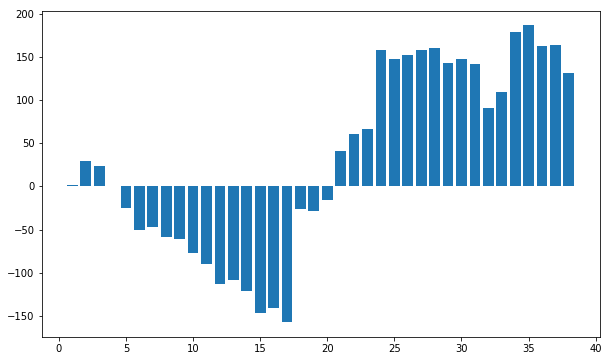

In [41]:
x = np.array(weekly_2018["gw_no"])
y = np.array(weekly_2018["CumulativeProfit"])
plt.figure(figsize=(10,6))
plt.bar(x,y)

## Understanding the best Value Cutoff
The Best Value Index is the ratio of difference between my model's result probability and the bookie's result probability. Anything over 1 means my model is more confident than the bookie is and so has determined there to be a value bet. But what happens if we limit ourselves to only betting on games where the value is above a certain point.

In [42]:
gambling_output[["BestValueIndex"]].describe()

,BestValueIndex
count,1862.000000
mean,1.193142
std,0.201439
min,0.959275
25%,1.061003
50%,1.132153
75%,1.254306
max,2.616026


In [43]:
np.linspace(0.95,2,20)

array([0.95      , 1.00526316, 1.06052632, 1.11578947, 1.17105263,
       1.22631579, 1.28157895, 1.33684211, 1.39210526, 1.44736842,
       1.50263158, 1.55789474, 1.61315789, 1.66842105, 1.72368421,
       1.77894737, 1.83421053, 1.88947368, 1.94473684, 2.        ])

In [44]:
roi = list()
profit = list()
fix_count = list()

for i in np.linspace(0.95,2,20):
    index_output = full_gambling_calc_cutoff(gambling_df,stake,bookie_home_odds,bookie_draw_odds,bookie_away_odds
                                            ,bookie_home_prob,bookie_draw_prob,bookie_away_prob
                                            ,model_home,model_draw,model_away,i)
    value_fixtures = index_output["ValueRequirementMet"].sum()
    cutoff_profit = index_output["ValueCutoffProfit"].sum()
    value_investment = value_fixtures*5
    value_roi = (cutoff_profit+value_investment)/value_investment
    
    roi.append(value_roi)
    profit.append(cutoff_profit)
    fix_count.append(value_fixtures)
    
    

Text(0.5, 1.0, 'Number of fixtures')

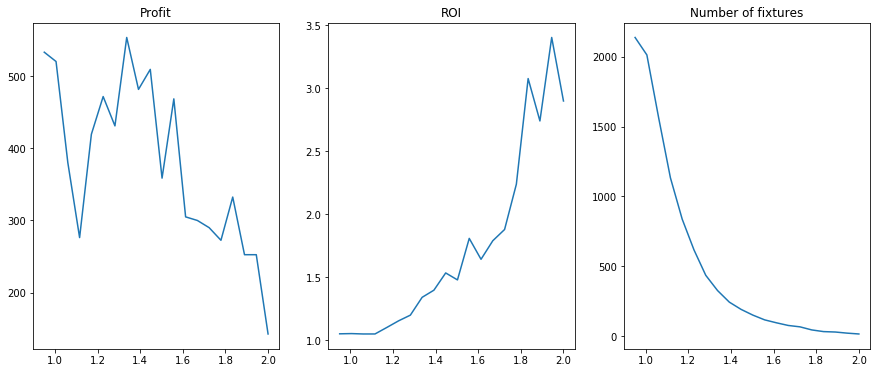

In [45]:
x=np.linspace(0.95,2,20)
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(131)
ax1.plot(x,profit)
ax1.set_title("Profit")

ax2 = fig.add_subplot(132)
ax2.plot(x,roi)
ax2.set_title("ROI")

ax3 = fig.add_subplot(133)
ax3.plot(x,fix_count)
ax3.set_title("Number of fixtures")

**Analysis**
As we increase the value requirement our overall profit goes down. However, our return on investment increases as we only bet on higher value games, as we're betting on far fewer games.

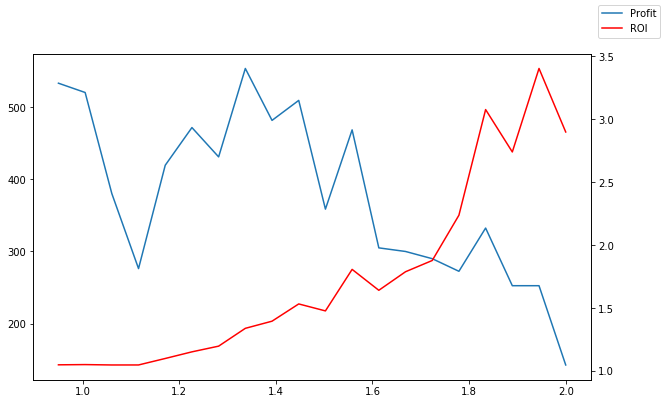

In [46]:
#plt.figure(figsize=(10,6))
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.plot(x,profit,label = "Profit")
ax_roi = ax1.twinx()
ax_roi.plot(x,roi,label ="ROI",color="red")
fig.legend(loc="upper right")#,bbox_to_anchor=(1,1),bbox_transform=ax1.transAxes)


## Impact of Index across seasons

In [47]:
index_output = full_gambling_calc_cutoff(gambling_df,stake,bookie_home_odds,bookie_draw_odds,bookie_away_odds
                                            ,bookie_home_prob,bookie_draw_prob,bookie_away_prob
                                            ,model_home,model_draw,model_away,1.3)
index_output.groupby(["season","bookie"]).agg(BookieAcc=("BookiePredCorrect","mean")
                                        ,ModelAcc=("ModelPredCorrect","mean")
                                        ,ModelReturns=("ModelPredProfit","sum")
                                        ,ValueAcc=("ValuePredCorrect","mean")
                                        ,ValueReturns=("ValuePredProfit","sum")
                                        ,ValueCutoffReturns=("ValueCutoffProfit","sum")
                                        #,ModelResultProb=("FinalResultProb","mean")
                                        ,Counts=("fixture","nunique")
                                        ,ValueCutoffCounts=("ValueRequirementMet","sum")).reset_index()

,season,bookie,BookieAcc,ModelAcc,ModelReturns,ValueAcc,ValueReturns,ValueCutoffReturns,Counts,ValueCutoffCounts
0,2014,Bet365,0.541667,0.525000,-66.60,0.386111,171.65,151.80,360,68
1,2015,Bet365,0.478610,0.462567,-241.15,0.336898,-49.10,26.75,374,57
2,2016,Bet365,0.613757,0.605820,152.75,0.277778,-75.50,60.25,378,92
3,2017,Bet365,0.550532,0.547872,-83.45,0.303191,158.55,145.00,376,57
4,2018,Bet365,0.588235,0.604278,111.10,0.304813,131.60,55.90,374,86
5,2019,Bet365,0.525362,0.510870,-166.25,0.326087,196.30,67.55,276,36


## Weekly Profit for Best Index 2018

In [48]:
gambling_2018 = index_output[index_output["season"]==2018]
weekly_2018 = gambling_2018.groupby("gw_no").agg(ModelCorrect =("ModelPredCorrect","sum")
                                     ,BookieCorrect=("BookiePredCorrect","sum")
                                     ,Counts=("fixture","nunique")
                                     ,ValueAcc=("ValuePredCorrect","mean")
                                     ,ValueReturns=("ValuePredProfit","sum")
                                     ,ValueCutoffReturns=("ValueCutoffProfit","sum")
                                     , ValueCounts =("ValueRequirementMet","sum")).reset_index()
weekly_2018["CumulativeProfit"] = weekly_2018["ValueReturns"].cumsum()
weekly_2018["CumulativeCutoffProfit"] = weekly_2018["ValueCutoffReturns"].cumsum()
weekly_2018["CumulativeInvestment"]=  weekly_2018["Counts"].cumsum()*5
weekly_2018["CumulativeCutoffInvestment"]=  weekly_2018["ValueCounts"].cumsum()*5

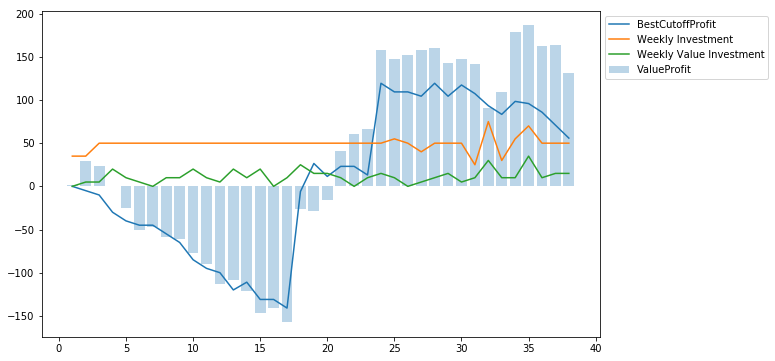

In [49]:
x = np.array(weekly_2018["gw_no"])
y = np.array(weekly_2018["CumulativeProfit"])
y2 = weekly_2018["CumulativeCutoffProfit"]
weekly_inv = weekly_2018["Counts"]*5
weekly_cutoff_inv = weekly_2018["ValueCounts"]*5
cumu_inv = weekly_2018["CumulativeInvestment"]
cumu_cutoff_inv = weekly_2018["CumulativeCutoffInvestment"]
cumu_returns = weekly_2018["CumulativeInvestment"] + weekly_2018["CumulativeProfit"]
cumu_value_returns = weekly_2018["CumulativeCutoffInvestment"] + weekly_2018["CumulativeCutoffProfit"]
cumu_roi = cumu_returns/cumu_inv
cumu_value_roi = cumu_value_returns/cumu_cutoff_inv

plt.figure(figsize=(10,6))
plt.bar(x,y,alpha = 0.3,label="ValueProfit")
plt.plot(x,y2,label="BestCutoffProfit")
plt.plot(x,weekly_inv,label="Weekly Investment")
plt.plot(x,weekly_cutoff_inv,label="Weekly Value Investment")
plt.legend(bbox_to_anchor=(1,1))

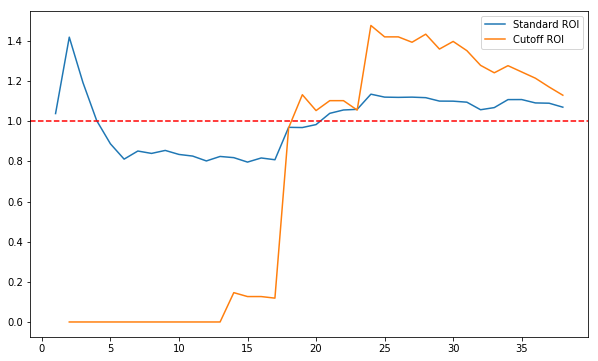

In [50]:
plt.figure(figsize=(10,6))
plt.plot(x,cumu_roi,label="Standard ROI")
plt.plot(x,cumu_value_roi,label="Cutoff ROI")
plt.axhline(1, color="red",linestyle="--")
plt.legend(bbox_to_anchor=(1,1))

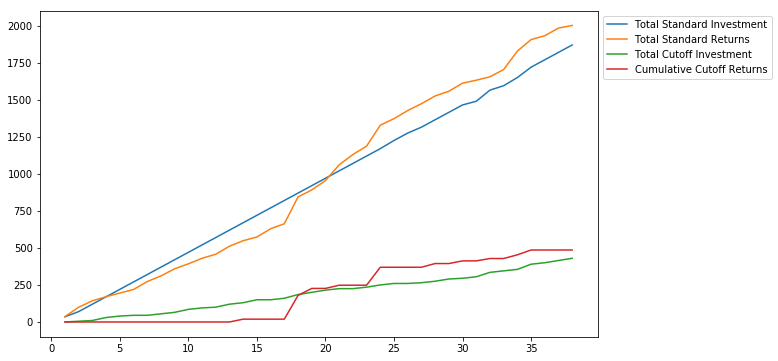

In [51]:
plt.figure(figsize=(10,6))
plt.plot(x,cumu_inv,label="Total Standard Investment")
plt.plot(x,cumu_returns,label="Total Standard Returns")
plt.plot(x,cumu_cutoff_inv,label="Total Cutoff Investment")
plt.plot(x,cumu_value_returns,label="Cumulative Cutoff Returns")
plt.legend(bbox_to_anchor=(1,1))

# Kelly Criterion

In [78]:
odds_preds = pd.merge(fixture_pred_poiss,odds_clean, on =["season","fixture"], how ="inner")
#odds_preds = odds_preds.rename(columns={"FTR":"Result"})
gambling_df = odds_preds.copy()
gambling_output = full_gambling_calc_cutoff(gambling_df,stake,bookie_home_odds,bookie_draw_odds,bookie_away_odds
                                            ,bookie_home_prob,bookie_draw_prob,bookie_away_prob
                                            ,model_home,model_draw,model_away,1.3)
gambling_output = gambling_output[gambling_output["season"]!=2019]
gambling_output.tail()

,matchid,fixture,f_Team,season,gw_no,f_HmGameFut,AttStr,DefStr,t_Goals,t_Goals Conceded,opponent,gw_sq,OppAttStr,OppDefStr,PredHomeGoals,PredAwayGoals,PoissHomeProb,PoissDrawProb,PoissAwayProb,Result,ResultCode_x,FTR,bookie,BookieHomeOdds,BookieDrawOdds,...,BookieAwayProb,ResultCode_y,Stake,HomeReturns,DrawReturns,AwayReturns,ResultReturns,ExpHomeReturns,ExpDrawReturns,ExpAwayReturns,BetIndexHome,BetIndexDraw,BetIndexAway,BestValueExpReturns,BestValueIndex,BookiePrediction,ModelPrediction,ValuePrediction,BookiePredCorrect,ModelPredCorrect,ValuePredCorrect,ValueRequirementMet,ModelPredProfit,ValuePredProfit,ValueCutoffProfit
1857,/matches/987971/,Watford vs West Ham United,Watford,2018,38,1,1.259195,1.592665,1,4,West Ham United,190,1.247600,1.520376,1.623129,1.297584,0.450565,0.243167,0.306267,A,0,A,Bet365,2.25,3.75,...,0.312500,0,5,6.25,13.75,11.0,11.00,0.068857,-0.440625,-0.099729,1.013771,0.911875,0.980054,0.068857,1.013771,H,H,H,0,0,0,0,-5.0,-5.0,0.0
1858,/matches/987967/,Liverpool vs Wolverhampton Wanderers,Liverpool,2018,38,1,2.134284,0.874597,2,0,Wolverhampton Wanderers,190,1.234710,1.391554,2.375223,0.581597,0.774339,0.152751,0.072871,H,2,H,Bet365,1.30,6.00,...,0.090909,2,5,1.50,25.00,50.0,1.50,0.033203,-0.417481,-0.992080,1.006641,0.916504,0.801584,0.033203,1.006641,H,H,H,1,1,1,0,1.5,1.5,0.0
1859,/matches/987963/,Burnley vs Arsenal,Burnley,2018,38,1,1.083391,1.531378,1,3,Arsenal,190,1.735148,1.314452,1.245078,1.726873,0.276222,0.236683,0.487093,A,0,A,Bet365,3.25,3.80,...,0.454545,0,5,11.25,14.00,6.0,6.00,-0.511393,-0.503029,0.358025,0.897721,0.899394,1.071605,0.358025,1.071605,A,A,A,1,1,1,0,6.0,6.0,0.0
1860,/matches/987969/,Southampton vs Huddersfield Town,Southampton,2018,38,1,1.255081,1.472974,1,1,Huddersfield Town,190,0.926556,1.712062,1.806677,0.858203,0.598067,0.227320,0.174610,D,1,D,Bet365,1.44,4.75,...,0.117647,1,5,2.20,18.75,37.5,18.75,-0.693915,0.398846,2.420906,0.861217,1.079769,1.484181,2.420906,1.484181,H,H,A,0,0,0,1,-5.0,-5.0,-5.0
1861,/matches/987965/,Fulham vs Newcastle United,Fulham,2018,38,1,1.131704,1.592520,0,4,Newcastle United,190,1.088719,1.514034,1.488971,1.137993,0.452646,0.257574,0.289780,A,0,A,Bet365,2.50,3.60,...,0.344828,0,5,7.50,13.00,9.5,9.50,0.658071,-0.363675,-0.798188,1.131614,0.927265,0.840362,0.658071,1.131614,H,H,H,0,0,0,0,-5.0,-5.0,0.0


In [79]:
def value_model_prob(result,home,draw,away):
    if result == "H":
        return home
    if result == "D":
        return draw
    if result == "A":
        return away

In [80]:
def kelly_share(ValuePrediction,ValueProb,BHO,BDO,BAO):
    if ValuePrediction =="H":
        b = BHO-1
    if ValuePrediction == "D":
        b = BDO - 1
    if ValuePrediction == "A":
        b = BAO-1
    p = ValueProb
    q = 1-p
    f = (b*p -q)/b
    if f >0:
        return f
    else:
        return 0

In [81]:
gambling_output["ValueProb"] = gambling_output.apply(lambda row: value_model_prob(row["ValuePrediction"],row[model_home],
                                                                                 row[model_draw],row[model_away])
                                                     ,axis =1)
gambling_output["ValueOdds"] = gambling_output.apply(lambda row: value_model_prob(row["ValuePrediction"],row[bookie_home_odds],
                                                                                 row[bookie_draw_odds],row[bookie_away_odds])
                                                     ,axis =1)
gambling_output["KellyShare"] = gambling_output.apply(lambda row: kelly_share(row["ValuePrediction"],row["ValueProb"],
                                                                             row[bookie_home_odds],row[bookie_draw_odds],
                                                                             row[bookie_away_odds]),axis=1)
gambling_output["KellyStake"] = gambling_output["KellyShare"]*50
gambling_output["KellyPotentialReturns"] = gambling_output.apply(lambda row: returns(row["KellyStake"],row["ValueOdds"]),axis=1)
gambling_output["KellyProfit"] = gambling_output.apply(lambda row: bet_profit(row["ValuePredCorrect"],row["KellyPotentialReturns"]
                                                                             , 1,row["KellyShare"]*50)
                                                      , axis=1)
gambling_output.tail()

,matchid,fixture,f_Team,season,gw_no,f_HmGameFut,AttStr,DefStr,t_Goals,t_Goals Conceded,opponent,gw_sq,OppAttStr,OppDefStr,PredHomeGoals,PredAwayGoals,PoissHomeProb,PoissDrawProb,PoissAwayProb,Result,ResultCode_x,FTR,bookie,BookieHomeOdds,BookieDrawOdds,...,ResultReturns,ExpHomeReturns,ExpDrawReturns,ExpAwayReturns,BetIndexHome,BetIndexDraw,BetIndexAway,BestValueExpReturns,BestValueIndex,BookiePrediction,ModelPrediction,ValuePrediction,BookiePredCorrect,ModelPredCorrect,ValuePredCorrect,ValueRequirementMet,ModelPredProfit,ValuePredProfit,ValueCutoffProfit,ValueProb,ValueOdds,KellyShare,KellyStake,KellyPotentialReturns,KellyProfit
1857,/matches/987971/,Watford vs West Ham United,Watford,2018,38,1,1.259195,1.592665,1,4,West Ham United,190,1.247600,1.520376,1.623129,1.297584,0.450565,0.243167,0.306267,A,0,A,Bet365,2.25,3.75,...,11.00,0.068857,-0.440625,-0.099729,1.013771,0.911875,0.980054,0.068857,1.013771,H,H,H,0,0,0,0,-5.0,-5.0,0.0,0.450565,2.25,0.011017,0.550858,0.688573,-0.550858
1858,/matches/987967/,Liverpool vs Wolverhampton Wanderers,Liverpool,2018,38,1,2.134284,0.874597,2,0,Wolverhampton Wanderers,190,1.234710,1.391554,2.375223,0.581597,0.774339,0.152751,0.072871,H,2,H,Bet365,1.30,6.00,...,1.50,0.033203,-0.417481,-0.992080,1.006641,0.916504,0.801584,0.033203,1.006641,H,H,H,1,1,1,0,1.5,1.5,0.0,0.774339,1.30,0.022135,1.106750,0.332025,0.332025
1859,/matches/987963/,Burnley vs Arsenal,Burnley,2018,38,1,1.083391,1.531378,1,3,Arsenal,190,1.735148,1.314452,1.245078,1.726873,0.276222,0.236683,0.487093,A,0,A,Bet365,3.25,3.80,...,6.00,-0.511393,-0.503029,0.358025,0.897721,0.899394,1.071605,0.358025,1.071605,A,A,A,1,1,1,0,6.0,6.0,0.0,0.487093,2.20,0.059671,2.983539,3.580247,3.580247
1860,/matches/987969/,Southampton vs Huddersfield Town,Southampton,2018,38,1,1.255081,1.472974,1,1,Huddersfield Town,190,0.926556,1.712062,1.806677,0.858203,0.598067,0.227320,0.174610,D,1,D,Bet365,1.44,4.75,...,18.75,-0.693915,0.398846,2.420906,0.861217,1.079769,1.484181,2.420906,1.484181,H,H,A,0,0,0,1,-5.0,-5.0,-5.0,0.174610,8.50,0.064557,3.227875,24.209062,-3.227875
1861,/matches/987965/,Fulham vs Newcastle United,Fulham,2018,38,1,1.131704,1.592520,0,4,Newcastle United,190,1.088719,1.514034,1.488971,1.137993,0.452646,0.257574,0.289780,A,0,A,Bet365,2.50,3.60,...,9.50,0.658071,-0.363675,-0.798188,1.131614,0.927265,0.840362,0.658071,1.131614,H,H,H,0,0,0,0,-5.0,-5.0,0.0,0.452646,2.50,0.087743,4.387142,6.580713,-4.387142


In [84]:
gambling_output.groupby(["season","bookie"]).agg(BookieAcc=("BookiePredCorrect","mean")
                                        ,ModelAcc=("ModelPredCorrect","mean")
                                        ,ModelReturns=("ModelPredProfit","sum")
                                        ,ValueAcc=("ValuePredCorrect","mean")
                                        ,ValueReturns=("ValuePredProfit","sum")
                                        ,ValueCutoffReturns=("ValueCutoffProfit","sum")
                                        #,ModelResultProb=("FinalResultProb","mean")
                                        ,Counts=("fixture","nunique")
                                        ,ValueCutoffCounts=("ValueRequirementMet","sum")
                                        ,KellyProfit= ("KellyProfit","sum")
                                        ,KellyInvestment =("KellyStake","sum")).reset_index()

,season,bookie,BookieAcc,ModelAcc,ModelReturns,ValueAcc,ValueReturns,ValueCutoffReturns,Counts,ValueCutoffCounts,KellyProfit,KellyInvestment
0,2014,Bet365,0.541667,0.525000,-66.60,0.386111,171.65,151.80,360,68,330.158255,1619.932414
1,2015,Bet365,0.478610,0.462567,-241.15,0.336898,-49.10,26.75,374,57,-247.863003,1659.062466
2,2016,Bet365,0.613757,0.605820,152.75,0.277778,-75.50,60.25,378,92,30.772284,1251.834448
3,2017,Bet365,0.550532,0.547872,-83.45,0.303191,158.55,145.00,376,57,56.582749,1031.003766
4,2018,Bet365,0.588235,0.604278,111.10,0.304813,131.60,55.90,374,86,165.588162,1060.288644


In [53]:
gambling_output.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1862 entries, 0 to 1861
Data columns (total 53 columns):
matchid                1862 non-null object
fixture                1862 non-null object
f_Team                 1862 non-null object
season                 1862 non-null int64
gw_no                  1862 non-null int64
f_HmGameFut            1862 non-null int64
AttStr                 1862 non-null float64
DefStr                 1862 non-null float64
t_Goals                1862 non-null int64
t_Goals Conceded       1862 non-null int64
opponent               1862 non-null object
gw_sq                  1862 non-null int64
OppAttStr              1862 non-null float64
OppDefStr              1862 non-null float64
PredHomeGoals          1862 non-null float64
PredAwayGoals          1862 non-null float64
PoissHomeProb          1862 non-null float64
PoissDrawProb          1862 non-null float64
PoissAwayProb          1862 non-null float64
Result                 1862 non-null object
ResultCode